<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/classifica%C3%A7%C3%A3o/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing

names = [
         "NUM_CURSOS",
         "CODIGO_IES",
         "DEFICIENCIA_FISICA",
         "DEFICIENCIA_VISUAL",
         "DEFICIENCIA_AUDITIVA", 
         "DEFICIENCIA_COGNITIVA", 
         "DEFICIENCIA_MULTIPLA", 
         "RECURSOS_DEF_FISICA",
         "RECURSOS_DEF_VISUAL", 
         "RECURSOS_DEF_AUDITIVA", 
         "RECURSOS_DEF_COGNITIVA",
         "RECURSOS_DEF_MULTIPLA"
         ]

         
dataset = pd.read_csv("deficiencias_e_recursos_por_ies.csv", index_col=0)

#Substitui NaN por 0
#dataset.fillna(0, inplace=True)
dataset.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_VISUAL,DEFICIENCIA_AUDITIVA,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,24.685776,5155.842525,10.470972,10.690131,5.923077,5.108853,0.594340,47.271322,99.576079,63.908205,24.451793,24.451793
std,43.996393,6550.729755,37.475156,39.208349,31.165147,24.047455,2.440019,678.198646,1096.887200,876.944158,406.698663,406.698663
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1051.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.456294,0.660569,0.250000,0.250000
50%,12.000000,2083.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.500000,1.777778,2.000000,1.000000,1.000000
75%,26.000000,4866.500000,5.000000,5.000000,3.000000,2.000000,0.000000,4.717199,5.683862,6.000000,3.000000,3.000000
max,928.000000,24672.000000,505.000000,616.000000,883.000000,634.000000,42.000000,18432.000000,27144.000000,24688.000000,12176.000000,12176.000000


Processa células não padronizadas (células vazias)

In [68]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in dataset.columns:
  if dataset[i].dtype == object:
    dataset[i] = le.fit_transform(dataset[i])
  else:
    pass

dataset_encoded = le.fit_transform(dataset.columns)

Normaliza os dados usando StandardScaler e treina o modelo

In [69]:
X = dataset.drop(columns=["CODIGO_IES"])
y = dataset["CODIGO_IES"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Cria o objeto KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [71]:
y_pred

array([  202,  1442,    71,  1854,  1313,   506,  1045,  1518,   705,
        2084,  1932,  1267, 19272,   600,   852,    76,  1940,  1247,
         299,  1587,  1838,   221,  1308,  1518,   202,   404,  1641,
         668,  1713,  1948,   792,  1613,   142,  1247,   757,  1175,
        2049,  1059,   140,  1502,  1227,  1441, 11860,  1767,   214,
         265,   600,   434,  2015,   600,   953,   916,  1362,  1313,
         533,  1931,    18,   852,   224,   849,   299,   600,   519,
         636,   144,  1442,   109,  1048,  1299,   668,  3784,   737,
       22123,  1066,   363,   363,  1175,  1080,   849,  2133,  1931,
          55,  1173,   514,  2084,   898,   299,   376,  1159,    27,
        1926,  1620,  1187,   597,  1694,     8,   480,  1375, 21903,
         363,   299,    71,     5,   275,   221,  1945,   802,    38,
       21903,   192,  1051,  1051,     1,  1375,  1441,   716,  1804,
         461,  2565,  1227,    57,    12,   224,  2084,     2,   192,
        1948,   461,

Faz a predição

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          27   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Mean Error')

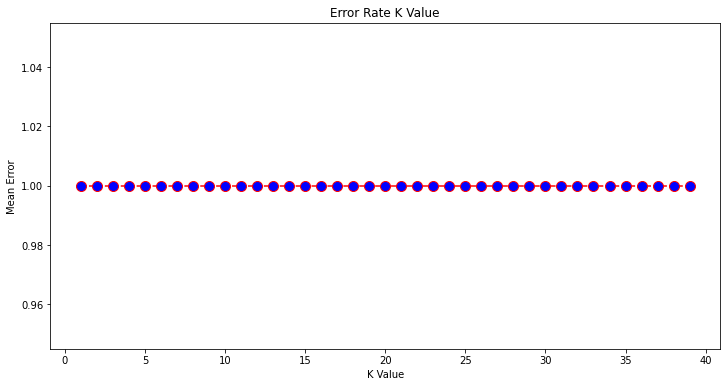

In [77]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')